In [ ]:
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from numpy import std
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [ ]:
# seed the random number generator
seed(1)

In [ ]:
# generate univariate observations
data = 5 * randn(10000) + 50

# Tracer un nuage de pionts pour le data

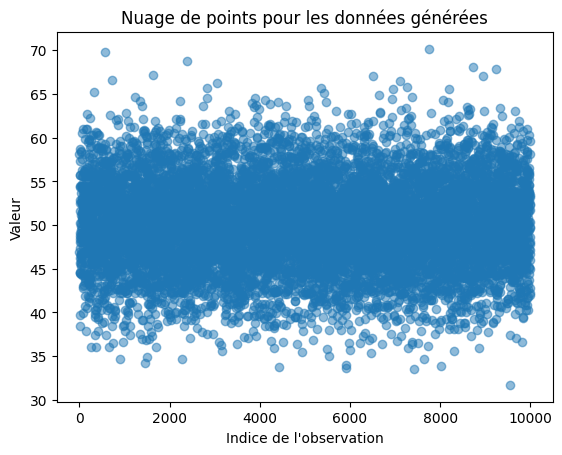

In [ ]:
# Scatter plot
plt.scatter(range(len(data)), data, alpha=0.5)
plt.title('Nuage de points pour les données générées')
plt.xlabel('Indice de l\'observation')
plt.ylabel('Valeur')
plt.show()

In [ ]:
!pip install -U matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 20.4 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.


# Tracer une courbe boite à moustage comme ce que vous voyez ci-desous

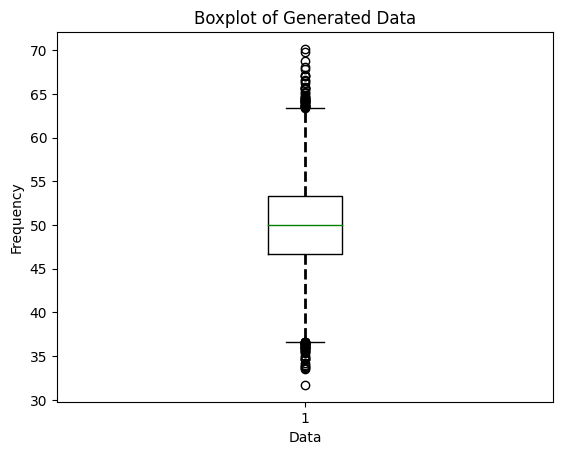

In [ ]:
# Calculate the quartiles, median, and whiskers
q1 = np.percentile(data, 25)
q3 = np.percentile(data, 75)
iqr = q3 - q1
whiskers = [q1 - 1.5 * iqr, q3 + 1.5 * iqr]

# Create the boxplot
plt.boxplot(data, whiskerprops=dict(linestyle='--', linewidth=2), medianprops={'color': 'green'})

# Add labels
plt.xlabel('Data')
plt.ylabel('Frequency')
plt.title('Boxplot of Generated Data')

# Show the plot
plt.show()

# Commenter la courbe trouvé et intérpréter la répartition des data

In [ ]:
#Calculer les quantile 0,25 et 0.75
# Calculate the quartiles
q1 = np.percentile(data, 25)
q3 = np.percentile(data, 75)

# Print the quartiles
print("Premier quartile (Q1) : {:.2f}".format(q1))
print("Troisième quartile (Q3) : {:.2f}".format(q3))

Premier quartile (Q1) : 46.69
Troisième quartile (Q3) : 53.36


In [ ]:
# Calculate the first quartile (Q1)
Q1 = np.percentile(data, 25)

# Print the value of the first quartile
print("Quartile Q1 vaut : {:.2f}".format(Q1))

Quartile Q1 vaut : 46.69


In [ ]:
# Calculate the third quartile (Q3)
Q3 = np.percentile(data, 75)

# Print the value of the third quartile
print("Quartile Q3 vaut : {:.2f}".format(Q3))

Quartile Q3 vaut : 53.36


# L'écart interquartile

- L’écart intequartile mesure la dispersion de 50% des données du dataset. Les 50% des données correspond à celles comprises entre le premier quartile Q1 et le 3eme quartile Q3.

- L’écart interquartile est tout simplement la soustraction du troisième quartile du premier : Q3 - Q1

# Définir le lower et upper pour identifier les valeurs aberrantes en utilisant l'écart interquartile

In [ ]:
# Calculate quartiles and IQR
Q1 = np.percentile(data, 25)
Q3 = np.percentile(data, 75)
IQR = Q3 - Q1

# Define cut_off (vous devez définir cette valeur)
cut_off = 1.5

# Define lower and upper limits for outlier detection
lower = Q1 - cut_off * IQR
upper = Q3 + cut_off * IQR

# Print the lower and upper limits
print('lower=%.3f , upper=%.3f ' % (lower, upper))

lower=36.675 , upper=63.370 



# identifier les  outliers

In [ ]:
# Define lower and upper limits for outlier detection
lower = Q1 - cut_off * IQR
upper = Q3 + cut_off * IQR

# Identify outliers
outliers = data[(data < lower) | (data > upper)]

# Print the identified outliers
print('Identified outliers: %d' % len(outliers))

Identified outliers: 81



# Supprimer les outliers


In [ ]:
# Identify outliers
outliers = data[(data < lower) | (data > upper)]

# Remove outliers
outliers_removed = data[(data >= lower) & (data <= upper)]

# Print the number of non-outlier observations
print('Non-outlier observations: %d' % len(outliers_removed))

Non-outlier observations: 9919


# commenter !!!

# Maintenant générer une data multivarié avec randn() par exemple avec 4 variables et 1000 observations et qui contient des valeurs aberrantes

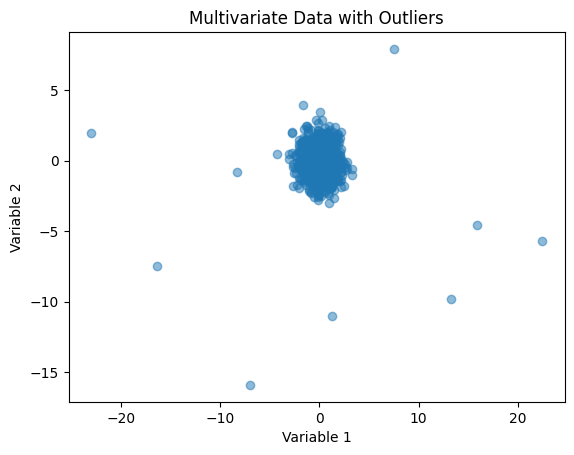

In [ ]:
# Seed the random number generator for reproducibility
np.random.seed(1)

# Number of variables
num_variables = 4

# Number of observations
num_observations = 1000

# Generate multivariate normal data
mean = np.zeros(num_variables)
covariance_matrix = np.eye(num_variables)  # Identity matrix for simplicity
multivariate_data = np.random.multivariate_normal(mean, covariance_matrix, num_observations)

# Introduce outliers manually (replace some values with random values outside the normal distribution)
num_outliers = 10  # Number of outliers to introduce

# Randomly choose indices for outliers
outlier_indices = np.random.choice(num_observations, num_outliers, replace=False)

# Introduce outliers by replacing values at outlier_indices
multivariate_data[outlier_indices, :] = 10 * np.random.randn(num_outliers, num_variables)

# Visualize the data (scatter plot for the first two variables)
plt.scatter(multivariate_data[:, 0], multivariate_data[:, 1], alpha=0.5)
plt.title('Multivariate Data with Outliers')
plt.xlabel('Variable 1')
plt.ylabel('Variable 2')
plt.show()

# Tracer les courbes de boites à moustache, Identifier les outlirers et les suuprimer

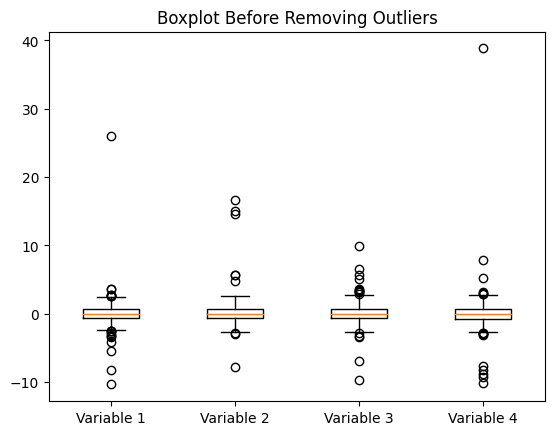

Identified outliers:
[[False False False False]
 [False False False False]
 [False False False False]
 ...
 [False False False False]
 [False False  True False]
 [False False False False]]


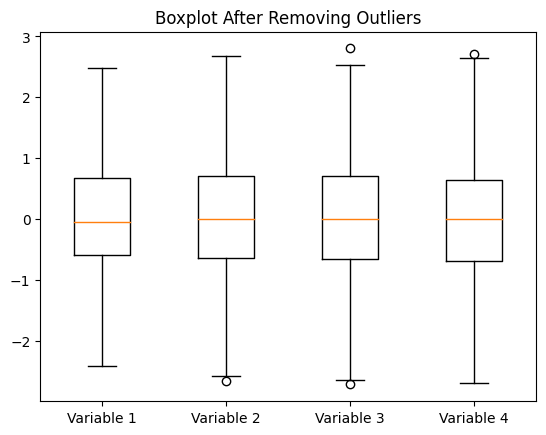

In [ ]:
# Generate multivariate normal data
mean = np.zeros(num_variables)
covariance_matrix = np.eye(num_variables)  # Identity matrix for simplicity
multivariate_data = np.random.multivariate_normal(mean, covariance_matrix, num_observations)

# Introduce outliers manually (replace some values with random values outside the normal distribution)
num_outliers = 10  # Number of outliers to introduce

# Randomly choose indices for outliers
outlier_indices = np.random.choice(num_observations, num_outliers, replace=False)

# Introduce outliers by replacing values at outlier_indices
multivariate_data[outlier_indices, :] = 10 * np.random.randn(num_outliers, num_variables)

# Boxplot before removing outliers
plt.boxplot(multivariate_data, labels=[f'Variable {i+1}' for i in range(num_variables)])
plt.title('Boxplot Before Removing Outliers')
plt.show()

# Calculate quartiles and IQR for each variable
q1 = np.percentile(multivariate_data, 25, axis=0)
q3 = np.percentile(multivariate_data, 75, axis=0)
iqr = q3 - q1

# Define cut_off (you must define this value)
cut_off = 1.5

# Define lower and upper limits for outlier detection
lower = q1 - cut_off * iqr
upper = q3 + cut_off * iqr

# Identify and print outliers
outliers = (multivariate_data < lower) | (multivariate_data > upper)
print('Identified outliers:')
print(outliers)

# Remove outliers
multivariate_data_no_outliers = multivariate_data[~outliers.any(axis=1)]

# Boxplot after removing outliers
plt.boxplot(multivariate_data_no_outliers, labels=[f'Variable {i+1}' for i in range(num_variables)])
plt.title('Boxplot After Removing Outliers')
plt.show()